# EDA

## Описание проекта
**Проект:** Анализ оттока клиентов телекоммуникационной компании

**Цель:** Выявить ключевые факторы, влияющие на отток клиентов, и построить модель для прогнозирования ухода клиентов.

**Бизнес-контекст:**
- Телекоммуникационная компания сталкивается с проблемой оттока клиентов (Churn)
- Привлечение нового клиента стоит в 5-7 раз дороже, чем удержание существующего
- Своевременное предсказание ухода клиента позволяет:
    - Предложить персональные условия удержания
    - Улучшить качество обслуживания проблемных сегментов

**Основные задачи**
1. Провести разведочный анализ данных (EDA)
2. Выявить ключевые факторы, влияющие на отток
3. Построить модель машинного обучения для прогнозирования оттока
4. Разработать рекомендации для отдела маркетинга и клиентского обслуживания

**Источник данных:** [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

**Размер датасета:** 7043 клиента x 21 признак

### Структура данных:

#### 1. Демографическая информация:
- `customerID` - уникальный идентификатор клиента
- `gender` - пол клиента
- `SeniorCitizen` - является ли клиент пенсионером (0/1)
- `Partner` - наличие партнера (супруга)
- `Dependents` - наличие иждивенцев

#### 2. Информация об услугах:
- `PhoneService` - наличие телефонной услуги
- `MultipleLines` - несколько телефонных линий
- `InternetService` - тип интернет-услуги
- `OnlineSecurity` - онлайн-безопасность
- `OnlineBackup` - онлайн-резервное копирование
- `DeviceProtection` - защита устройства
- `TechSupport` - техническая поддержка
- `StreamingTV` - потоковое телевидение
- `StreamingMovies` - потоковые фильмы

#### 3. Информация об учетной записи:
- `tenure` - срок пребывания клиента (месяцы)
- `Contract` - тип контракта
- `PaperlessBilling` - безбумажный биллинг
- `PaymentMethod` - способ оплаты
- `MonthlyCharges` - ежемесячные расходы
- `TotalCharges` - общие расходы

#### 4. Целевая переменная:
- `Churn` - отток клиента (Yes/No)


## Data loading/Загрузка данных

In [100]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style("whitegrid")
np.random.seed(42)

In [59]:
DATA_PATH = "../data/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [60]:
if os.path.exists(DATA_PATH):
    data = pd.read_csv(DATA_PATH)
    print(f"Данные загружены: {data.shape[0]} строк, {data.shape[1]} столбцов")
else:
    raise FileNotFoundError(f"Файл {DATA_PATH} не найден!")

Данные загружены: 7043 строк, 21 столбцов


## Data overview/Осмотр данный

In [61]:
# Посмотрим на данные
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
# Посмотрим пропущенные значения
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [63]:
data.isna().mean()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

В данных нет пропусков
TotalCharges выглядит подозрительно, строковый тип вместо численного.

Необходимо проверить на наличие некорректных данных, исправить и привести к численному типу

In [64]:
data.duplicated().sum()
# дубликатов нет

np.int64(0)

In [65]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [66]:
data.describe(include="str")


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## Target analysis/Проверка качества данных

In [67]:
# Вычислим процент оттока клиентов
print(f"Процент оттока клиентов составляет: {data["Churn"].value_counts()["Yes"] / data["Churn"].count() * 100:.2f}%")

Процент оттока клиентов составляет: 26.54%


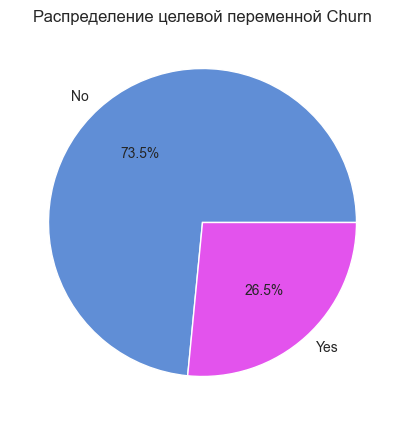

In [68]:
plt.figure(figsize = (8,5))
plt.pie(data["Churn"].value_counts(), labels=["No", "Yes"], autopct="%1.1f%%", colors=["#608ed6", '#e353ed'])
plt.title("Распределение целевой переменной Churn")
plt.show()

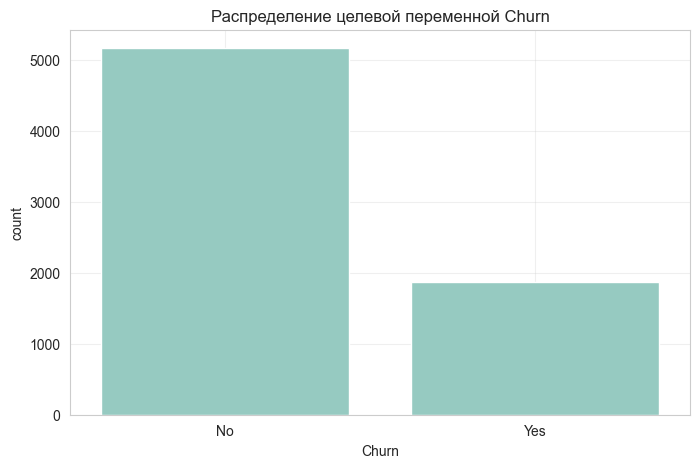

In [69]:
plt.figure(figsize = (8,5))
sns.countplot(x=data["Churn"])
plt.title("Распределение целевой переменной Churn")
plt.grid(True, alpha=0.3)

Видим умеренный дисбаланс (26.58%), поэтому не сможем использовать accuracy.
Метрики, которые мы можем использовать:
* F1 - баланс precision/recall
* ROC_AUC - площадь под ROC кривой
* recall - сколько ушедших нашли (важно для бизнеса!)
* precision - среди предсказанных ушедших сколько реально уйдут

Каждый 3 клиент уходит
Recall важнее precision, т.к лучше предупредить уход

Ответим на вопросы:
- Какие 3 признака сильнее всего коррелируют с оттоком?
- Как зависит отток от типа контракта?
- Есть ли разница в оттоке между новыми (tenure < 12) и лояльными клиентами (tenure > 24)?
- Какие информацию можно извлечь из MonthlyCharges и TotalCharges?

## Hypothesis Testing/Проверка гипотез

В этом разделе проанализируем признаки, которые потенциально влияют на отток клиентов.

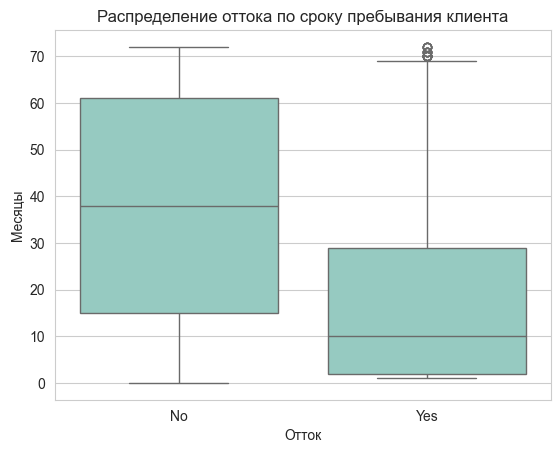

In [70]:
# Начнем с числовых признаков. Проверим есть ли разница в оттоке между новыми и лояльными клиентами.

sns.boxplot(x="Churn", y="tenure", data=data)
plt.title("Распределение оттока по сроку пребывания клиента")
plt.xlabel("Отток")
plt.ylabel("Месяцы")
plt.show()

Вывод:

Наблюдается выраженная зависимость между сроком пользования услугой и оттоком. Клиенты с малым сроком пользования уходят заметно чаще, тогда как клиенты, пользующиеся услугами более 30 месяцев, имеют существенно более низкую долю оттока.

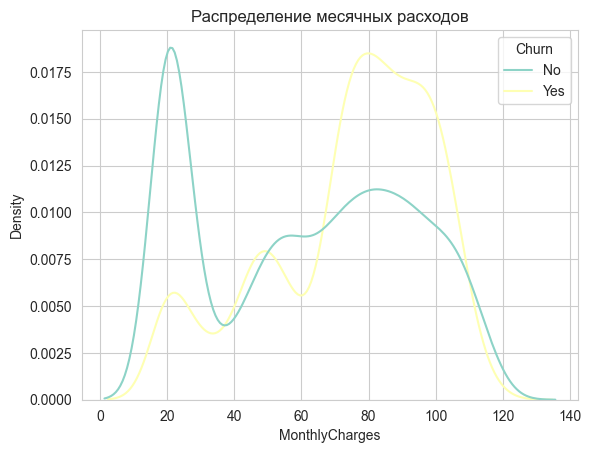

In [71]:
sns.kdeplot(data=data, x="MonthlyCharges", hue="Churn", common_norm=False)
plt.title("Распределение месячных расходов");

Вывод:

Распределение MonthlyCharges имеет бимодальный характер как для churn, так и для non-churn клиентов.

Это может указывать на наличие различных групп клиентов с разным уровнем потребления услуг, однако причина бимодальности требует дополнительной проверки.

In [72]:
# Средние месячные расходы в каждой группе
data.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [73]:
# Преобразуем Churn в числовой тип
data["Churn"] = data["Churn"].map({"Yes": 1, "No": 0})

In [74]:
low_price_range = (20, 40)
high_price_range = (70, 120)

low_price_churn_rate = data[
    (data["MonthlyCharges"] >= low_price_range[0]) & (data["MonthlyCharges"] <= low_price_range[1])
]["Churn"].mean()

high_price_churn_rate = data[
    (data["MonthlyCharges"] >= high_price_range[0]) & (data["MonthlyCharges"] <= high_price_range[1])
]["Churn"].mean()

print(f"Отток в бюджетном сегменте ({low_price_range}): {low_price_churn_rate:.2f}%")
print(f"Отток в премиум сегменте ({high_price_range}): {high_price_churn_rate:.2f}%")

Отток в бюджетном сегменте ((20, 40)): 0.13%
Отток в премиум сегменте ((70, 120)): 0.35%


Что хорошо:

1. Бюджетный сегмент стабилен - клиенты довольны соотношением цена/качество
2. Высокий спрос на базовые услуги - пик в районе 20-30$ показывает востребованность простых тарифов

Что плохо:
1. Проблема с дорогим сегментом - самые дорогие клиенты уходят
2. Возможно клиенты не видят преимуществ за высокую цену


Посмотрим теперь на общие расходы клиентов, предварительно исправив их

In [75]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
# преобразуем данные признака в численный тип, игнорируя ошибки и заменяя их на Null

data["TotalCharges"].isna().sum() # просмотрим сколько пропусков и заполним их медианой

np.int64(11)

In [76]:
median_total_charges = data["TotalCharges"].median()
data["TotalCharges"] = data["TotalCharges"].fillna(median_total_charges)

print(f"Пропуски после чистки: {data["TotalCharges"].isna().sum()}")

Пропуски после чистки: 0


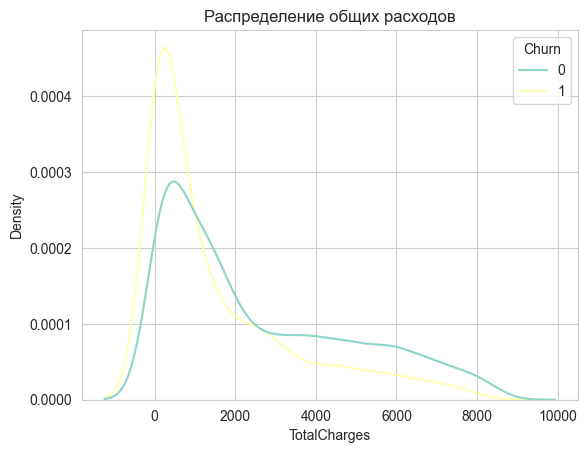

In [77]:
sns.kdeplot(data=data, x="TotalCharges", hue="Churn", common_norm=False)
plt.title("Распределение общих расходов");

Вывод:
Клиенты с оттоком имеют меньшие значения TotalCharges.
Однако данный эффект может быть обусловлен тем, что TotalCharges напрямую связан со сроком пользования услугами (tenure), и требует учета при дальнейшем анализе и моделировании.

In [78]:
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns
numeric_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='str')

In [79]:
correlations = data[numeric_cols].corr()
correlations

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102652,0.150889
tenure,0.016567,1.000000,0.247900,0.825464,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.650864,0.193356
TotalCharges,0.102652,0.825464,0.650864,1.000000,-0.199037
Churn,0.150889,-0.352229,0.193356,-0.199037,1.000000


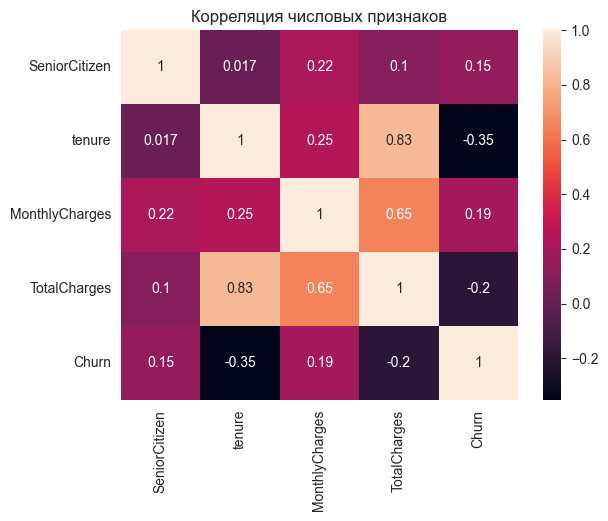

In [80]:
sns.heatmap(correlations, annot=True)
plt.title('Корреляция числовых признаков')
plt.show()

Наблюдается умеренная отрицательная корреляция между tenure и churn, что указывает на снижение риска оттока по мере увеличения срока использования услуг.

MonthlyCherges демонстрирует слабую положительную корреляцию, что может свидетельствовать о чувствительности части клиентов к уровню ежемесячных платежей.

Связь TotalCharges с churn, возможно, отражает влияние длительности использования услуг, так как данный признак сильно коррелирует с tenure и MonthlyCharges, что указывает на мультиколлинеарность.



Посчитаем долю churn по категориям

In [81]:
categorical_cols = data.select_dtypes(include=["object", "category", "str"]).columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.append("SeniorCitizen")

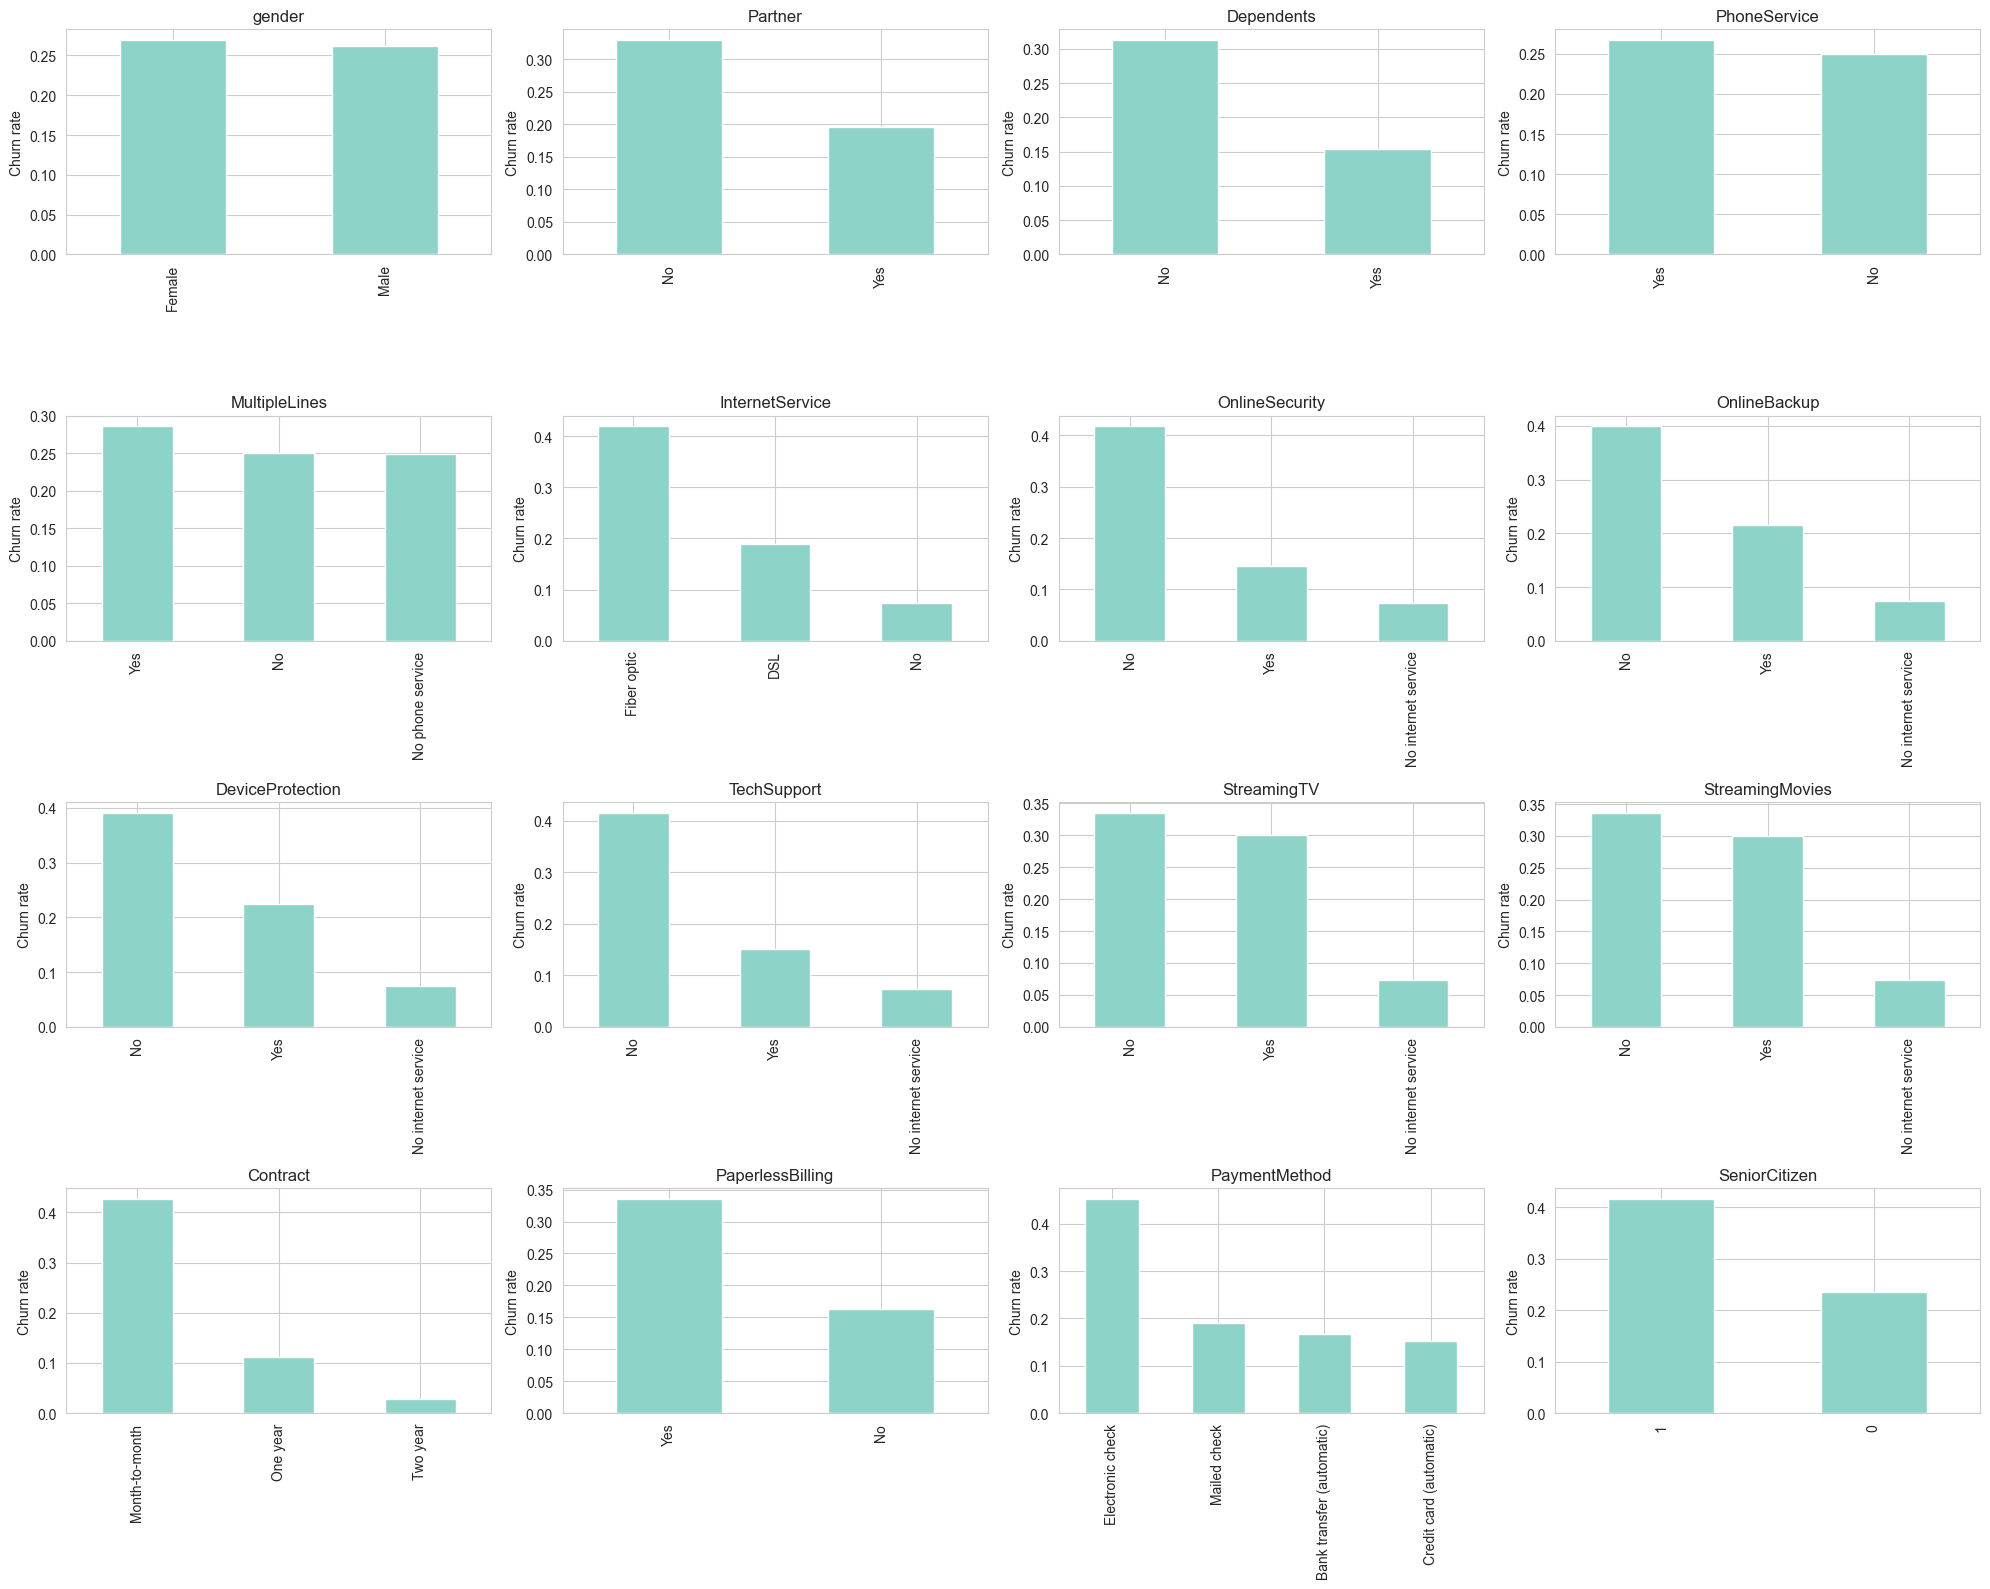

In [82]:
import math

n_cols = 4
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_cols, n_rows, figsize=(20, 16))
axes = axes.flatten()

for ax, col in zip(axes, categorical_cols):
    churn_rate = data.groupby(col)["Churn"].mean().sort_values(ascending=False)
    churn_rate.plot(kind="bar", ax=ax)
    ax.set_title(col)
    ax.set_ylabel("Churn rate")
    ax.set_xlabel("")

# удаляем пустые оси, если они есть
for ax in axes[len(categorical_cols):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

**Сontract**

Доля оттока существенно различается между типами контрактов.
Клиенты с помесячным контрактом демонстрируют значительно более высокий отток (churn), чем клиенты с годовым и двухгодичными контрактами (разница составляет порядка **39 п.п.**).

Это указывает на сильную связь типа контракта с оттоком и подтверждает, что долгосрочные контракты ассоциированы с удержанием клиентов.


**PaymentMethod**

Наблюдаются заметные различия в доле churn между способами оплаты. Наиболее высокий уровень оттока характерен для клиентов, использующих
электронный чк, тогда как клиенты с автоматическим списаниями (банковский счёт или кредитная карта) уходят реже (разница достигается **30 п.п.**).

Это может указывать на более низкую лояльность клиентов без автоматических платежей.

**StreamingTV / StreamingMovies**

Признак содержит категорию "No internet service", которая отражает отсутствие интернет-сервиса, а не отказ от услуги.

Среди клиентов с интернет-севисом наблюдается более высокая доля churn у тех, кто не подключил стриминговые услуги, по сравнению с клиентами, использующими данные сервисы (разница порядка **3.7 п.п.**).

Это позволяет предположить, что использование дополнительных сервисов ассоциировано с более низким уровнем оттока.


--------------------------------------------------------------------------------------------------
Наиболее сильная связь с оттоком наблюдается дя следующих категориальных признаков Contract, PaymentMethod, а также признаков, связанных с подключением дополнительных сервисов. Остальные категориальные признаки демонстрируют слаюую или умеренную связь с churn.